<a href="https://colab.research.google.com/github/Davichobacter/Machine-Learning-4GEEKS/blob/main/Proyecto_Tutorial_de_Clasficador_de_Imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow >null
!pip install -q -U keras-tuner > null


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#traer las librerias
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import io
#keras que maneja imagenes
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [8]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/dogs-vs-cats-20250814T202644Z-1-001.zip"


In [9]:
with ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall("/content/datos_entrenamiento")

Carpetas separadas paa dog y cat y estamos preparando la base para usarla con Keras tiene esta clase de ImageDataGenerator; tiene tres métodos: flow(),flow_from_directory() y flow_from_dataframe

In [10]:
archivos= os.listdir("/content/datos_entrenamiento/dogs-vs-cats/train")
imagenes_train2 = [i for i in archivos if i.startswith('dog') and i.lower().endswith(('jpg', 'jpeg', 'png'))][:9] #imagenes train dog
imagenes_train2.sort()


In [11]:
url= "/content/datos_entrenamiento/dogs-vs-cats/train"
os.makedirs(os.path.join(url,"cat"))
os.makedirs(os.path.join(url,"dog"))


In [12]:
import shutil
archivos= os.path.join("/content/datos_entrenamiento/dogs-vs-cats/train")
for fname in os.listdir(archivos):
    if fname.lower().startswith("dog."):
        shutil.move(os.path.join(archivos, fname),
                    os.path.join(url, "dog", fname))
    elif fname.lower().startswith("cat."):
        shutil.move(os.path.join(archivos, fname),
                    os.path.join(url, "cat", fname))

In [13]:
import os

# Ver si el archivo existe
archivo = "/content/datos_entrenamiento/dogs-vs-cats/train/dog.12414.jpg"
print(os.path.exists(archivo))

# Listar primeros archivos de la carpeta
print(os.listdir("/content/datos_entrenamiento/dogs-vs-cats/train")[:10])


False
['dog', 'cat']


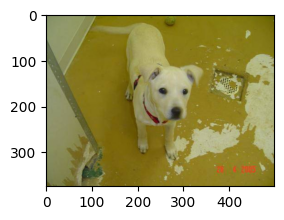

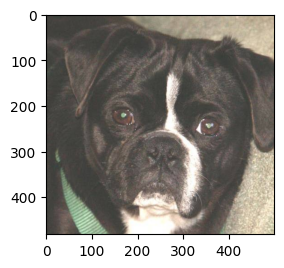

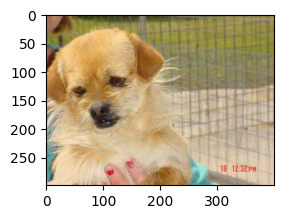

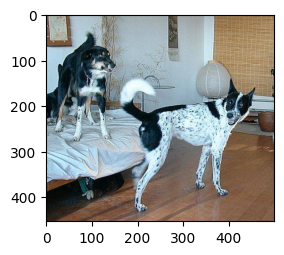

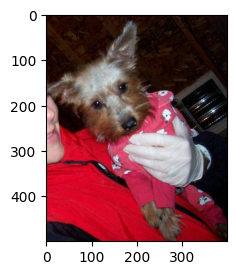

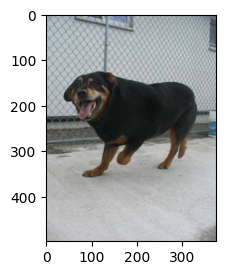

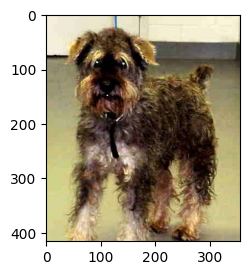

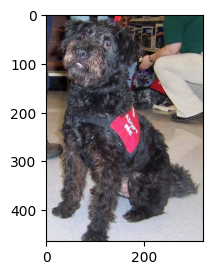

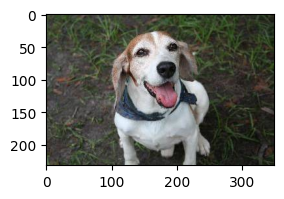

In [14]:
import os
from PIL import Image
import matplotlib.pyplot as plt

for i, j in enumerate(imagenes_train2):
    carpeta = "dog" if "dog" in j else "cat"
    ruta = os.path.join("/content/datos_entrenamiento/dogs-vs-cats/train", carpeta, j)

    if os.path.exists(ruta):  # solo abre si existe
        plt.figure(figsize=(10,10))
        plt.subplot(3, 3, i+1)
        imagen = Image.open(ruta)
        plt.imshow(imagen)
    else:
        print("Archivo no encontrado:", ruta)

In [15]:
for i, j in enumerate(imagenes_train2):
  plt.figure(figsize=(10,10))
  imagen = Image.open(os.path.join("/content/datos_entrenamiento/dogs-vs-cats/train",j))
  plt.subplot(3,3, i+1)
  plt.imshow(imagen)
  plt.axis("off")
  plt.title(j)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/datos_entrenamiento/dogs-vs-cats/train/dog.12153.jpg'

<Figure size 1000x1000 with 0 Axes>

In [16]:
archivos= os.listdir("/content/datos_entrenamiento/dogs-vs-cats/train")
imagenes_train1 = [i for i in archivos if i.startswith('cat') and i.lower().endswith(('jpg', 'jpeg', 'png'))][:9] #imagenes train cat
imagenes_train1.sort()

In [17]:
for i, j in enumerate(imagenes_train1):
  plt.figure(figsize=(10,10))
  imagen = Image.open(os.path.join("/content/datos_entrenamiento/dogs-vs-cats/train/",j))
  plt.subplot(3,3, i+1)
  plt.imshow(imagen)
  plt.axis("off")
  plt.title(j)
  plt.show()

In [18]:


for i, j in enumerate(imagenes_train1):
    # Detectar si es perro o gato por el nombre
    carpeta = "dog" if j.startswith("dog") else "cat"

    # Armar ruta completa
    ruta = os.path.join("/content/datos_entrenamiento/dogs-vs-cats/train", carpeta, j)

    # Verificar que existe antes de abrir
    if os.path.exists(ruta):
        plt.figure(figsize=(10,10))
        plt.subplot(3,3, i+1)
        imagen = Image.open(ruta)
        plt.imshow(imagen)
        plt.axis("off")
        plt.title(j)
        plt.show()
    else:
        print("No encontrado:", ruta)


In [19]:
#imagenes 200x 200 pixeles

size200 = (200, 200)
for k in imagenes_train2:
  dog200= os.path.join("/content/datos_entrenamiento/dogs-vs-cats/train/",k)
  imagen200 = Image.open(dog200).convert('RGB')
  imagen200 = imagen200.resize(size200)
  imagen200.save(dog200)


dog200

FileNotFoundError: [Errno 2] No such file or directory: '/content/datos_entrenamiento/dogs-vs-cats/train/dog.12153.jpg'

In [20]:
import numpy as np
label_dog=np.array([1 if f.startswith("dog")else 0 for f in archivos])
label_dog[:9]

array([1, 0])

In [21]:
import numpy as np
label_cat=np.array([1 if f.startswith("cat")else 0 for f in archivos])
label_cat[:9]

array([0, 1])

In [22]:
data_train= ImageDataGenerator(rescale=1./255,validation_split=0.2) # esto nos sirve para generar los datos de entrenamiento


In [23]:
#alimentar la red neuronal
train_generator= data_train.flow_from_directory( #creamos el generador del entrenamiento
    directory=url,
    target_size=(200,200),
    batch_size=32,
    class_mode= "binary",
    subset='training'
)


Found 887 images belonging to 2 classes.


In [24]:
#generador de validacion
val_generator= data_train.flow_from_directory(
    directory=url,
    target_size=(200,200),
    batch_size=32,
    class_mode= "binary",
    subset='validation'
)

Found 221 images belonging to 2 classes.


In [25]:
#modelo Conv2D + MaxPooling2D: caracteristicas visuales
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(200, 200, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  # binario: perro o gato
])

#define como se va ajustar el modelo
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Suponiendo que ya tienes tus generadores 'train_generator' y 'val_generator'

# 1. Calcula los pasos necesarios para cada conjunto de datos
#    Usamos la división entera // para asegurarnos de obtener un número entero.
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = val_generator.n // val_generator.batch_size

print(f"Pasos por época: {steps_per_epoch}")
print(f"Pasos de validación: {validation_steps}")

Pasos por época: 27
Pasos de validación: 6


In [37]:
model.fit(
    x=train_generator,
    validation_data=val_generator,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9615 - loss: 0.1467 - val_accuracy: 0.6198 - val_loss: 0.8326
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9688 - loss: 0.1278 - val_accuracy: 0.6354 - val_loss: 0.8522
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.9823 - loss: 0.0994 - val_accuracy: 0.6250 - val_loss: 0.9854
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0816 - val_accuracy: 0.6354 - val_loss: 0.9372
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9897 - loss: 0.0536 - val_accuracy: 0.5677 - val_loss: 1.0976
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0758 - val_accuracy: 0.5781 - val_loss: 1.0451
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.9973 - loss: 0.0362 - val_accuracy: 0.5729 - val_loss: 1.4308
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9375 - loss: 0.0853 - val_accuracy: 0.5990 - 

In [44]:
ruta="/content/Gato-Singapura.jpg"

#prueba, pasamos el tamaño para que coincida con la imgaen que se entreno el modelo
prueba=image.load_img(ruta,target_size=(200,200))
prueba_array= image.img_to_array(prueba)/255.0
prueba_array= np.expand_dims(prueba_array,axis=0)
pred= model.predict(prueba_array)


pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.00397131]], dtype=float32)

In [45]:
#el modelo devuelve 0 y 1

if pred[0][0] > 0.5:
    print(f"Es un 🐶 perro con {pred[0][0]*100:.2f}% de confianza")
else:
    print(f"Es un 🐱 gato con {(1 - pred[0][0])*100:.2f}% de confianza")

Es un 🐱 gato con 99.60% de confianza


In [46]:
print(train_generator.class_indices)

{'cat': 0, 'dog': 1}


In [51]:
ruta="/content/WV6UNC4DCZAN3ND5AE4DM23CY4.jpg"

#prueba, pasamos el tamaño para que coincida con la imgaen que se entreno el modelo
prueba=image.load_img(ruta,target_size=(200,200))
prueba_array= image.img_to_array(prueba)/255.0
prueba_array= np.expand_dims(prueba_array,axis=0)
pred= model.predict(prueba_array)


pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.99995995]], dtype=float32)

In [52]:
#el modelo devuelve 0 y 1

if pred[0][0] > 0.5:
    print(f"Es un 🐶 perro con {pred[0][0]*100:.2f}% de confianza")
else:
    print(f"Es un 🐱 gato con {(1 - pred[0][0])*100:.2f}% de confianza")

Es un 🐶 perro con 100.00% de confianza
